# Project 09 - Anthony Micco

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [1]:
#importing the packages
import pandas as pd
import geopandas as gpd

In [2]:
#reading in National Park data
nationalParkData = gpd.read_file('/anvil/projects/tdm/data/nps/nps_boundary.shp')

<Axes: >

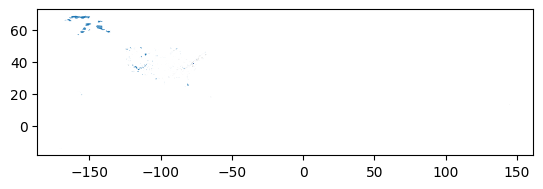

In [4]:
#plotting nationalParkData before filtering 
nationalParkData.plot()

In [8]:
#viewing the head of the national park data to determine columns to filter out data
nationalParkData.head()

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDa,Creator,EditDate,Editor,GlobalID,Shape_Leng,Shape_Area,geometry
0,1,APIS,Lands - http://landsnet.nps.gov/tractsnet/docu...,Apostle Islands National Lakeshore,20241017,WI,MW,1581059,National Lakeshore,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Apostle Islands,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{5B7E3AC2-BCC0-4470-B73E-067F4578B8E7},NaN,6.320611e+08,"MULTIPOLYGON (((-90.87032 46.62816, -90.87039 ..."
1,2,APPA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Appalachian National Scenic Trail,20241213,CT,NE,2766084,National Scenic Trail,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Appalachian,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{02262213-67A3-4DBC-AF75-6092CDF6F55D},NaN,2.227504e+09,"MULTIPOLYGON (((-70.16547 45.13539, -70.16540 ..."
2,3,CEBE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Cedar Creek and Belle Grove National Historica...,20241216,VA,NE,1985663,National Historical Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Cedar Creek & Belle Grove,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{C4976B23-F150-4771-BBCD-CDD5641E2511},NaN,2.329143e+07,"MULTIPOLYGON (((-78.30493 39.00486, -78.30476 ..."
3,4,EFMO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Effigy Mounds National Monument,20241216,IA,MW,456249,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Effigy Mounds,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{73E134FC-CCE8-4F57-857C-1E2F1AA68336},NaN,1.895188e+07,"MULTIPOLYGON (((-91.19742 43.09766, -91.19744 ..."
4,5,GUIS,Lands - http://landsnet.nps.gov/tractsnet/docu...,Gulf Islands National Seashore,20241216,FL,SE,689020,National Seashore,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Gulf Islands,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{545C36BF-2E4E-43CF-8A23-654B4D767625},NaN,7.103221e+08,"MULTIPOLYGON (((-88.80838 30.38926, -88.80838 ..."


In [21]:
#viewing the unique values in the STATE column
pd.unique(nationalParkData["STATE"])

array(['WI', 'CT', 'VA', 'IA', 'FL', 'MD', 'IN', 'NE', 'WA', 'CA', 'MI',
       'HI', 'SC', 'MA', 'NY', 'IL', 'LA', 'MN', 'PA', 'ME', 'NJ', 'NH',
       'RI', 'VT', 'ND', 'SD', 'MT', 'UT', 'CO', 'WY', 'AZ', 'ID', 'DC',
       'WV', 'AL', 'GA', 'KY', 'NC', 'PR', 'VI', 'TN', 'MS', 'OH', 'KS',
       'MO', 'AR', 'TX', 'NM', 'OK', 'NV', 'GU', 'AS', 'OR', 'AK', 'DE',
       nan], dtype=object)

In [27]:
#filtering out Guam, American Somoa,Virgin Islands, Puerto Rico, Alaska and Hawaii
continentalData = nationalParkData[~nationalParkData["STATE"].isin(["PR", "HI", "AK", "VI", "GU", "AS"])]

In [28]:
#check to make sure the data was filtered correctly
pd.unique(continentalData["STATE"])

array(['WI', 'CT', 'VA', 'IA', 'FL', 'MD', 'IN', 'NE', 'WA', 'CA', 'MI',
       'SC', 'MA', 'NY', 'IL', 'LA', 'MN', 'PA', 'ME', 'NJ', 'NH', 'RI',
       'VT', 'ND', 'SD', 'MT', 'UT', 'CO', 'WY', 'AZ', 'ID', 'DC', 'WV',
       'AL', 'GA', 'KY', 'NC', 'TN', 'MS', 'OH', 'KS', 'MO', 'AR', 'TX',
       'NM', 'OK', 'NV', 'OR', 'DE', nan], dtype=object)

In [29]:
#filtering out American Memorial Park
filtered = continentalData.drop(continentalData[continentalData["PARKNAME"] == "American Memorial Park"].index)

In [31]:
#checking to make sure the final park was removed
filtered.shape

(396, 20)

<Axes: >

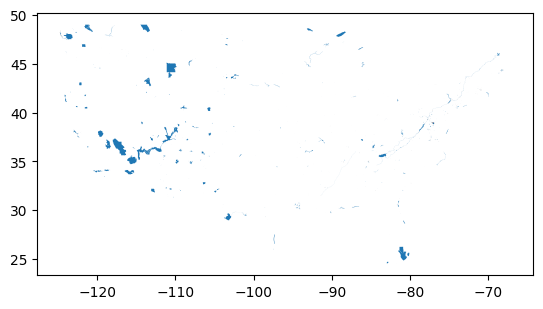

In [33]:
#plotting the filtered data
filtered.plot()

## Question 2

In [34]:
#filtering out the data so only the california parks are included
californiaData = nationalParkData[nationalParkData["STATE"] == "CA"]

In [36]:
#checking to make sure only california parks are included
californiaData.head()

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDa,Creator,EditDate,Editor,GlobalID,Shape_Leng,Shape_Area,geometry
11,12,PINN,Lands - http://landsnet.nps.gov/tractsnet/docu...,Pinnacles National Park,20241217,CA,PW,247533,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Pinnacles,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{A0C8C1F4-2A7E-425C-BAAC-5EE1B65AFB08},NaN,1.675443e+08,"MULTIPOLYGON (((-121.14470 36.53426, -121.1445..."
13,14,PORE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Point Reyes National Seashore,20241217,CA,PW,234493,National Seashore,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Point Reyes,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{8D29B505-2956-45C5-9A71-78B1061E09AD},NaN,4.698178e+08,"MULTIPOLYGON (((-122.84126 38.07312, -122.8412..."
314,315,CABR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Cabrillo National Monument,20240318,CA,PW,255957,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Cabrillo,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{04440699-6A53-435B-9738-65F184A4DA23},NaN,9.186350e+05,"POLYGON ((-117.24160 32.67724, -117.24254 32.6..."
315,316,CHIS,Lands - http://landsnet.nps.gov/tractsnet/docu...,Channel Islands National Park,20201217,CA,PW,1662323,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Channel Islands,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{0E9A80B0-DC44-4CB7-98F8-06B83593AEA3},NaN,1.449812e+09,"MULTIPOLYGON (((-119.26682 34.24806, -119.2668..."
316,317,DEVA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Death Valley National Park,20200122,CA,PW,857501,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Death Valley,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{03A8454E-59FF-48C1-A24C-B65C63DFDB64},NaN,2.154423e+10,"MULTIPOLYGON (((-116.28841 36.42813, -116.2883..."


<Axes: >

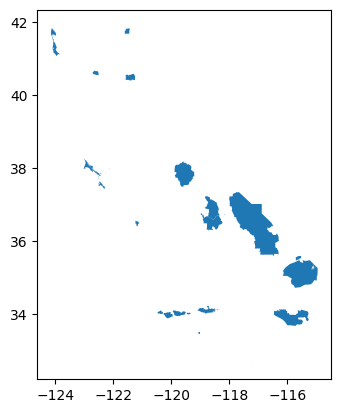

In [37]:
californiaData.plot()

Looking at the maps from both Question 1 and Question 2, it does make more sense now and it makes it easier to spot California on the larger map. 

## Question 3

In [40]:
#creating the second data set 
secondData = gpd.read_file("/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp")

In [41]:
#checking to see what column needs filtered out
secondData.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [42]:
#filtering out the data from Puerto Rico, Alaska, and Hawaii
continentalData2 = secondData[~secondData["NAME"].isin(["Puerto Rico", "Hawaii", "Alaska"])]

In [44]:
#checking to see if the data was filtered correctly
pd.unique(continentalData2["NAME"])

array(['Maryland', 'Iowa', 'Delaware', 'Ohio', 'Pennsylvania', 'Nebraska',
       'Washington', 'Alabama', 'Arkansas', 'New Mexico', 'Texas',
       'California', 'Kentucky', 'Georgia', 'Wisconsin', 'Oregon',
       'Missouri', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Illinois', 'Montana', 'Minnesota',
       'Indiana', 'Massachusetts', 'Kansas', 'Nevada', 'Vermont',
       'Connecticut', 'New Jersey', 'District of Columbia',
       'North Carolina', 'Utah', 'North Dakota', 'South Carolina',
       'Mississippi', 'Colorado', 'South Dakota', 'Oklahoma', 'Wyoming',
       'West Virginia', 'Maine', 'New Hampshire', 'Arizona',
       'Rhode Island'], dtype=object)

In [45]:
#renaming the STUSPS column
continentalData2 = continentalData2.rename(columns={"STUSPS":"STATE"})

In [54]:
#checking to make sure the column was renamed correctly
continentalData2.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STATE', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [55]:
#combining the dataframes using an inner join (combines them based on columns present in both dataframes)
combinedDF = pd.concat([filtered, continentalData2], ignore_index = True,join='inner')

In [56]:
#viewing combinedDF to ensure it's correct
combinedDF

,STATE,geometry
0,WI,"MULTIPOLYGON (((-90.87032 46.62816, -90.87039 ..."
1,CT,"MULTIPOLYGON (((-70.16547 45.13539, -70.16540 ..."
2,VA,"MULTIPOLYGON (((-78.30493 39.00486, -78.30476 ..."
3,IA,"MULTIPOLYGON (((-91.19742 43.09766, -91.19744 ..."
4,FL,"MULTIPOLYGON (((-88.80838 30.38926, -88.80838 ..."
...,...,...
440,WV,"POLYGON ((-82.59886 38.20101, -82.58469 38.240..."
441,ME,"MULTIPOLYGON (((-68.92401 43.88541, -68.87478 ..."
442,NH,"POLYGON ((-72.55611 42.86625, -72.53147 42.897..."
443,AZ,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."


<Axes: >

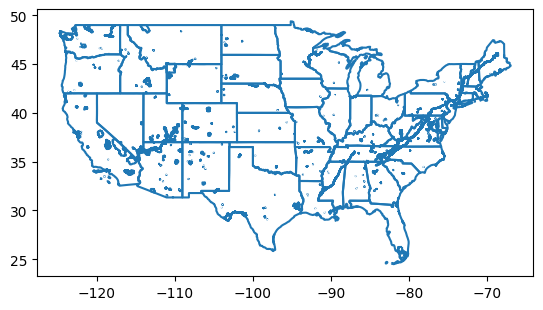

In [60]:
#mapping the combined df with boundaries
combinedDF.boundary.plot()

## Question 4

In [62]:
# confirming californiaData still functional
californiaData

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDa,Creator,EditDate,Editor,GlobalID,Shape_Leng,Shape_Area,geometry
11,12,PINN,Lands - http://landsnet.nps.gov/tractsnet/docu...,Pinnacles National Park,20241217,CA,PW,247533,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Pinnacles,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{A0C8C1F4-2A7E-425C-BAAC-5EE1B65AFB08},NaN,1.675443e+08,"MULTIPOLYGON (((-121.14470 36.53426, -121.1445..."
13,14,PORE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Point Reyes National Seashore,20241217,CA,PW,234493,National Seashore,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Point Reyes,NaN,NPS_WASO_LANDS,20250114111109,NPS_WASO_LANDS,{8D29B505-2956-45C5-9A71-78B1061E09AD},NaN,4.698178e+08,"MULTIPOLYGON (((-122.84126 38.07312, -122.8412..."
314,315,CABR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Cabrillo National Monument,20240318,CA,PW,255957,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Cabrillo,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{04440699-6A53-435B-9738-65F184A4DA23},NaN,9.186350e+05,"POLYGON ((-117.24160 32.67724, -117.24254 32.6..."
315,316,CHIS,Lands - http://landsnet.nps.gov/tractsnet/docu...,Channel Islands National Park,20201217,CA,PW,1662323,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Channel Islands,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{0E9A80B0-DC44-4CB7-98F8-06B83593AEA3},NaN,1.449812e+09,"MULTIPOLYGON (((-119.26682 34.24806, -119.2668..."
316,317,DEVA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Death Valley National Park,20200122,CA,PW,857501,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Death Valley,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{03A8454E-59FF-48C1-A24C-B65C63DFDB64},NaN,2.154423e+10,"MULTIPOLYGON (((-116.28841 36.42813, -116.2883..."
317,318,GOGA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Golden Gate National Recreation Area,20240625,CA,PW,255952,National Recreation Area,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Golden Gate,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{DEA21732-25C8-454A-81AB-2089428F453A},NaN,5.352561e+08,"MULTIPOLYGON (((-122.51785 37.53951, -122.5184..."
319,320,FOPO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Fort Point National Historic Site,20100224,CA,PW,1655639,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Fort Point,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{422C6C03-401D-4953-B321-01DD3211239B},NaN,1.628009e+05,"POLYGON ((-122.47074 37.80709, -122.47063 37.8..."
320,321,EUON,Lands - http://landsnet.nps.gov/tractsnet/docu...,Eugene O'Neill National Historic Site,20090514,CA,PW,1888915,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Eugene O'Neill,NaN,NPS_WASO_LANDS,20250114111112,NPS_WASO_LANDS,{E2E7AC85-B261-4B0E-B0A2-A6B73FF2B574},NaN,8.573563e+04,"POLYGON ((-122.02485 37.82524, -122.02641 37.8..."
326,327,JOTR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Joshua Tree National Park,20190613,CA,PW,277261,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Joshua Tree,NaN,NPS_WASO_LANDS,20250114111113,NPS_WASO_LANDS,{54C8728B-932F-46CD-BAAC-4655595FE8ED},NaN,4.698083e+09,"MULTIPOLYGON (((-116.32366 34.07989, -116.3225..."
328,329,MOJA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Mojave National Preserve,20240917,CA,PW,1888945,National Preserve,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Mojave,NaN,NPS_WASO_LANDS,20250114111113,NPS_WASO_LANDS,{28B9AFB4-D8AD-4DDE-8307-B90FD73825EE},NaN,9.627304e+09,"MULTIPOLYGON (((-116.05776 35.27833, -116.0577..."


In [64]:
#creating californiaBoundaryDF 
californiaBoundaryDF = continentalData2[continentalData2["NAME"] == "California"]

In [66]:
californiaBoundaryDF

,STATEFP,STATENS,AFFGEOID,GEOID,STATE,NAME,LSAD,ALAND,AWATER,geometry
12,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."


In [69]:
#combining californiaData and californiaBoundaryData
caliCombined =  pd.concat([californiaData, californiaBoundaryDF], ignore_index = True, join="inner")

In [71]:
#checking to see if data frames combined correctly
caliCombined

,STATE,geometry
0,CA,"MULTIPOLYGON (((-121.14470 36.53426, -121.1445..."
1,CA,"MULTIPOLYGON (((-122.84126 38.07312, -122.8412..."
2,CA,"POLYGON ((-117.24160 32.67724, -117.24254 32.6..."
3,CA,"MULTIPOLYGON (((-119.26682 34.24806, -119.2668..."
4,CA,"MULTIPOLYGON (((-116.28841 36.42813, -116.2883..."
5,CA,"MULTIPOLYGON (((-122.51785 37.53951, -122.5184..."
6,CA,"POLYGON ((-122.47074 37.80709, -122.47063 37.8..."
7,CA,"POLYGON ((-122.02485 37.82524, -122.02641 37.8..."
8,CA,"MULTIPOLYGON (((-116.32366 34.07989, -116.3225..."
9,CA,"MULTIPOLYGON (((-116.05776 35.27833, -116.0577..."


<Axes: >

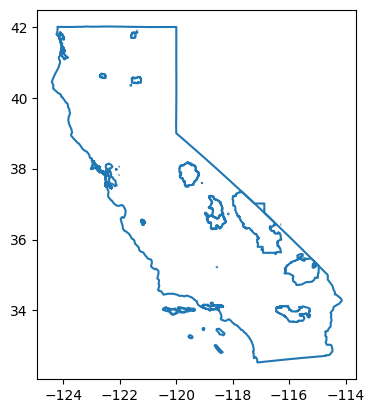

In [72]:
caliCombined.boundary.plot()

## Question 5

In [73]:
# reading in aiannh data
aiannhdata = gpd.read_file('/anvil/projects/tdm/data/aiannh/tl_2023_us_aiannh.shp')

<Axes: >

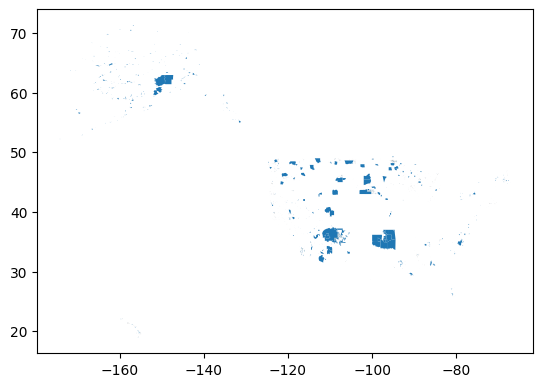

In [76]:
#plotting aiannhdata to examine it
aiannhdata.plot()

In [78]:
#finding the max and min of the x and y values in the geometry column
aiannhdata['geometry'].bounds

,minx,miny,maxx,maxy
0,-72.113364,41.470155,-72.075658,41.500368
1,-73.152074,41.252491,-72.262712,41.557205
2,-119.640819,36.980017,-119.631715,36.988068
3,-120.897458,40.146917,-120.887748,40.151104
4,-114.851447,47.003872,-113.665384,47.887207
...,...,...,...,...
857,-94.963093,36.869575,-94.877470,36.929113
858,-98.620799,35.014000,-97.999343,35.148531
859,-95.728030,39.697069,-95.713734,39.704982
860,-106.513712,35.357986,-106.474762,35.368108


In [79]:
#finding the minimum longitudinal value
aiannhdata['geometry'].bounds.minx

0      -72.113364
1      -73.152074
2     -119.640819
3     -120.897458
4     -114.851447
          ...    
857    -94.963093
858    -98.620799
859    -95.728030
860   -106.513712
861   -106.400636
Name: minx, Length: 862, dtype: float64

In [80]:
#extracting this data from the aiannh data
aiannhcontinentaldata = aiannhdata[aiannhdata['geometry'].bounds.minx > -125]

In [83]:
#coloring the aiannh regions blue
aiannhcontinentaldata = aiannhcontinentaldata.assign(mycolors='blue')

In [84]:
#checking to make sure mycolors was added
aiannhcontinentaldata.columns

Index(['AIANNHCE', 'AIANNHNS', 'GEOID', 'GEOIDFQ', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'COMPTYP', 'AIANNHR', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'geometry', 'mycolors'],
      dtype='object')

In [82]:
#coloring the data set from Project 7 green
continentalData2 = continentalData2.assign(mycolors='green')

In [86]:
#checking to make sure mycolors was added
continentalData2.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STATE', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'mycolors'],
      dtype='object')

In [88]:
#combining the two dataframes together
myresults = pd.concat([continentalData2[['geometry','mycolors']], aiannhcontinentaldata[['geometry','mycolors']]], ignore_index=True)

<Axes: >

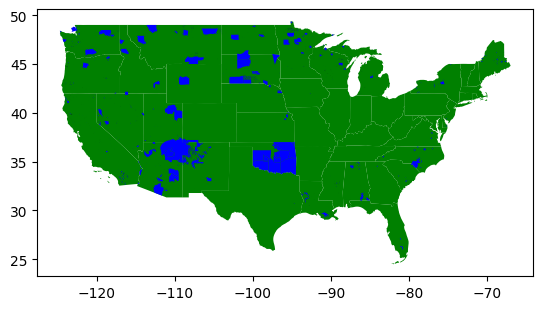

In [89]:
#plotting the combined data frames
myresults.plot(color = myresults['mycolors'])

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.